<a href="https://colab.research.google.com/github/Alaa-abdelmajied/Pattern_Recognition_Sheets/blob/main/sheet%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import precision_score, recall_score, f1_score 
from scipy.spatial import distance_matrix
from sklearn import metrics

In [ ]:
data = np.array([[5,8],[10,8],[11,8],[6,7],[10,7],[12,7],[13,7],[5,6],[10,6],[13,6],[6,5],[9,4],[11,5],[14,6],[15,5],[2,4],[3,4],[5,4],[6,4],[7,4],[15,4],[3,3],[7,3],[8,2]])

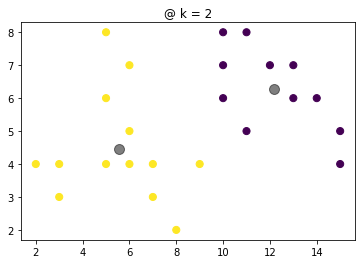

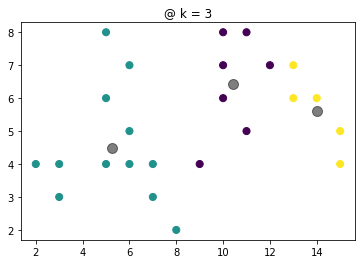

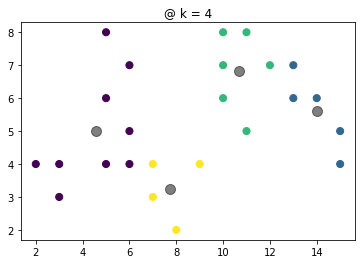

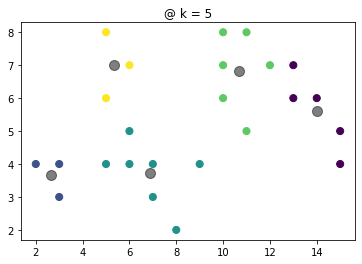

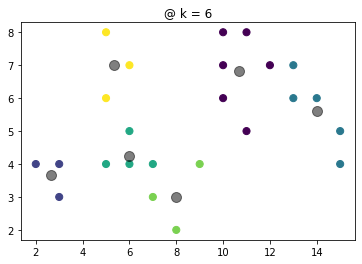

In [ ]:
#Question 1

K = [2,3,4,5,6]
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
  plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
  plt.title('@ k = ' + str(k))
  plt.show()

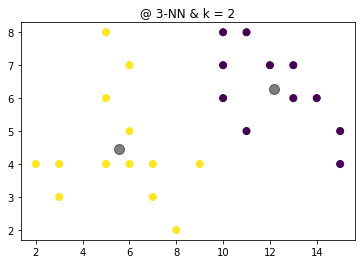

custer: [1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1]


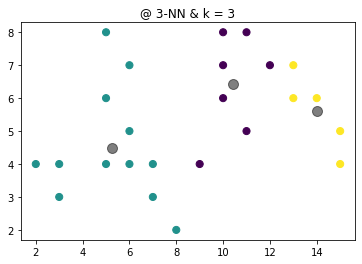

custer: [1 0 0 1 0 0 2 1 0 2 1 0 0 2 2 1 1 1 1 1 2 1 1 1]


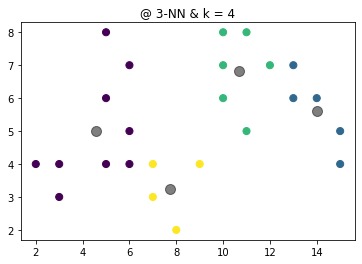

custer: [0 2 2 0 2 2 1 0 2 1 0 3 2 1 1 0 0 0 0 3 1 0 3 3]


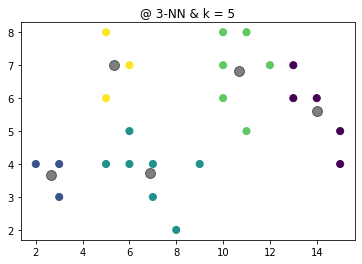

custer: [4 3 3 4 3 3 0 4 3 0 2 2 3 0 0 1 1 2 2 2 0 1 2 2]


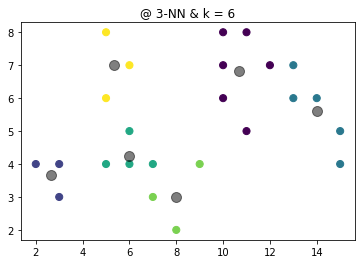

custer: [5 0 0 5 0 0 2 5 0 2 3 4 0 2 2 1 1 3 3 3 2 1 4 4]


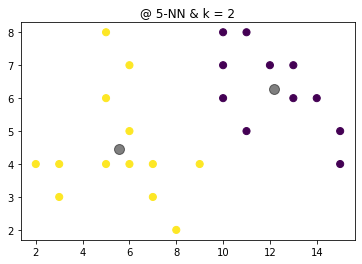

custer: [1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1]


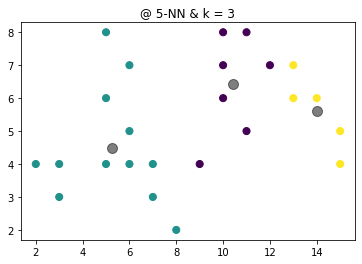

custer: [1 0 0 1 0 0 2 1 0 2 1 0 0 2 2 1 1 1 1 1 2 1 1 1]


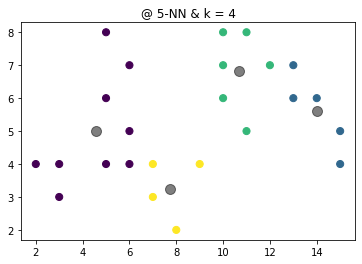

custer: [0 2 2 0 2 2 1 0 2 1 0 3 2 1 1 0 0 0 0 3 1 0 3 3]


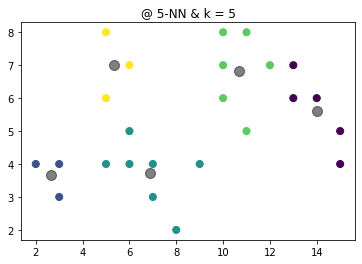

custer: [4 3 3 4 3 3 0 4 3 0 2 2 3 0 0 1 1 2 2 2 0 1 2 2]


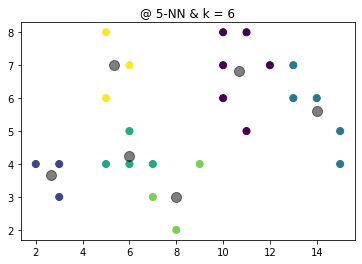

custer: [5 0 0 5 0 0 2 5 0 2 3 4 0 2 2 1 1 3 3 3 2 1 4 4]


In [ ]:
#Question 2 

K = [2,3,4,5,6]
knn = [3,5]
for value in knn:
  adjMat = kneighbors_graph(data, value, mode='connectivity', include_self=False)
  adjMat = adjMat.toarray()

  degreeMatrix=np.zeros((24))
  for i in range(24):
    degreeMatrix[i]=np.sum(adjMat[i],axis=0)
  degreeMatrix = np.diagflat(degreeMatrix)

  laplacian = degreeMatrix - adjMat
  normalizedLaplacian = np.dot(np.linalg.inv(degreeMatrix),laplacian)

  eigenValue,eigenVector = np.linalg.eigh(normalizedLaplacian)
  idx = eigenValue.argsort()[::1]   
  eigenValue = eigenValue[idx]
  eigenVector = eigenVector[:,idx]
  for k in K:
    eigenVec=eigenVector[:,:k]

    for i in range(24):
      norm=np.linalg.norm(eigenVec[i])
      eigenVec[i]=eigenVec[i]/norm

    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
    plt.title('@ '+str(value)+'-NN & k = ' + str(k))
    plt.show()
    print('custer:',kmeans.labels_)

In [ ]:
#Question 3

kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
predict = kmeans.labels_

t1 = np.array([[2,4],[3,4],[3,3]])
t2 = np.array([[5,8],[6,7],[5,6],[6,5],[5,4],[6,4],[7,4],[9,4],[7,3],[8,2]])
t3 = np.array([[10,8],[11,8],[10,7],[10,6],[11,5],[12,7],[13,7],[13,6],[14,6],[15,5],[15,4]])

groundTruth = np.zeros(24)
idx = 0;
for corodinate in data:
  for cor in t1:
    if np.array_equal(corodinate,cor):
      groundTruth[idx] = 0
      idx += 1 
  for cor in t2:
    if np.array_equal(corodinate,cor):
      groundTruth[idx] = 1
      idx += 1 
  for cor in t3:
    if np.array_equal(corodinate,cor):
      groundTruth[idx] = 2
      idx += 1 

In [ ]:
# purity

contengencyTable = pd.crosstab(predict,groundTruth)
contengencyTable["Total"] = contengencyTable[0] + contengencyTable[1] + contengencyTable[2]
purity = 1/24*(contengencyTable.max(0)[0] + contengencyTable.max(0)[1] + contengencyTable.max(0)[2])
print('purity = ',purity)

purity =  0.75


In [ ]:
#Pairwise

tp = sum(np.diag(contengencyTable))
fp = sum(contengencyTable.sum(axis = 0)[0:3]) - tp
fn = sum(contengencyTable['Total']) - tp
tn = 276 - tp - fn - fp

jaccard = tp/(fn+tp+fp)
Rand = (tp + tn)/(tp + tn + fp + fn)
print('Jaccard = ',jaccard)
print('Rand = ',Rand)

Jaccard =  0.4117647058823529
Rand =  0.927536231884058


In [ ]:
#Conditional Entropy

clusterProbs  = np.unique(predict, return_counts=True)[1]/predict.shape[0]
condEntropy = np.zeros((3))
for row in range(3):
  condEntropyRow = 0
  for col in range(3):
    if contengencyTable[col][row] != 0:
      condEntropyRow += (-contengencyTable[col][row]/contengencyTable["Total"][row])*np.log2(contengencyTable[col][row]/contengencyTable["Total"][row])
  condEntropy[row] = condEntropyRow*clusterProbs[row]
print('Conditional Entropy = ',sum(condEntropy))

Conditional Entropy =  0.5782102893160785


In [ ]:
#Max matching

maxMatch = 0
for row in range(3):
   maxMatch += contengencyTable[row][row]
maxMatch /=sum(contengencyTable["Total"])
print('Max matching = ',maxMatch)

Max matching =  0.5833333333333334


In [ ]:
#F-measure

prec=precision_score(groundTruth, predict, average='macro',zero_division=1)
recall=recall_score(groundTruth, predict, average='macro',zero_division=1)
f_measure=(2.0*prec*recall)/(prec+recall)
print('F-measure = ',f_measure)

F-measure =  0.5090287945339189


In [ ]:
proximityMat = distance_matrix(data,data).astype(int)
weightMat = np.zeros((3,3))
cluster1 = []
cluster2 = []
cluster3 = []

for i in range(24):
  if(predict[i] == 0):
    cluster1.append(i)
  elif (predict[i] == 1):
    cluster2.append(i)
  else:
    cluster3.append(i)

for i in range(len(cluster1)):
  for j in range(len(cluster1)):
    weightMat[0][0] += proximityMat[i][j]

for i in range(len(cluster2)):
    for j in range(len(cluster2)):
        weightMat[1][1] += proximityMat[i][j]
        
for i in range(len(cluster3)):
    for j in range(len(cluster3)):
        weightMat[2][2] += proximityMat[i][j]
        
for i in range(len(cluster1)):
    for j in range(len(cluster2)):
        weightMat[0][1] += proximityMat[i][j]

for i in range(len(cluster1)):
    for j in range(len(cluster3)):
        weightMat[0][2] += proximityMat[i][j]

for i in range(len(cluster2)):
    for j in range(len(cluster1)):
        weightMat[1][0] += proximityMat[i][j]
        
for i in range(len(cluster2)):
    for j in range(len(cluster3)):
        weightMat[1][2] += proximityMat[i][j]
    
for i in range(len(cluster3)):
    for j in range(len(cluster1)):
        weightMat[2][0] += proximityMat[i][j]
        
for i in range(len(cluster3)):
    for j in range(len(cluster2)):
        weightMat[2][1] += proximityMat[i][j]

In [ ]:
#Beta CV
# in Nin nC2 is calculated with calculator

win = 0.5*(np.sum(np.diag(weightMat)))
wout = weightMat[0][1] + weightMat[0][2] + weightMat[1][2]
nout = 97
nin = len(cluster1)*len(cluster2) + len(cluster1)*len(cluster3) + len(cluster2)*len(cluster3)

betaCV = (nout*win)/(nin*wout)
print('Beta CV = ',betaCV)

Beta CV =  0.3289456475028493


In [ ]:
#Normalized Cut

total = weightMat.sum(axis = 1)
wc1 = weightMat[0][1] + weightMat[0][2]
wc2 = weightMat[1][0] + weightMat[1][2]
wc3 = weightMat[2][0] + weightMat[2][1]
nc = wc1/total[0] + wc2/total[1] + wc3/total[2]
print('Normalized Cut = ',nc)

Normalized Cut =  2.039784215784216
